In [1]:
import pandas_datareader as web

In [26]:
spy = web.DataReader('spy','yahoo',start,end)

In [27]:
import datetime

In [28]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)

In [29]:
apple = web.DataReader('AAPL', 'yahoo', start,end)

In [30]:
spy

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,128.380005,127.430000,127.760002,127.500000,193697900.0,104.950813
2012-01-04,127.809998,126.709999,127.199997,127.699997,127186500.0,105.115456
2012-01-05,128.229996,126.430000,127.010002,128.039993,173895000.0,105.395294
2012-01-06,128.220001,127.290001,128.199997,127.709999,148050000.0,105.123695
2012-01-09,128.179993,127.410004,128.000000,128.020004,99530200.0,105.378860
...,...,...,...,...,...,...
2016-12-23,225.720001,225.210007,225.429993,225.710007,36697800.0,205.937912
2016-12-27,226.729996,226.000000,226.020004,226.270004,42672500.0,206.448837
2016-12-28,226.589996,224.270004,226.570007,224.399994,64095000.0,204.742661


In [31]:
apple

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557466
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624950
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765112
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898556
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878099
...,...,...,...,...,...,...
2016-12-23,29.129999,28.897499,28.897499,29.129999,56998000.0,27.344475
2016-12-27,29.450001,29.122499,29.129999,29.315001,73187600.0,27.518139
2016-12-28,29.504999,29.049999,29.379999,29.190001,83623600.0,27.400793


In [32]:
import matplotlib.pyplot as plt

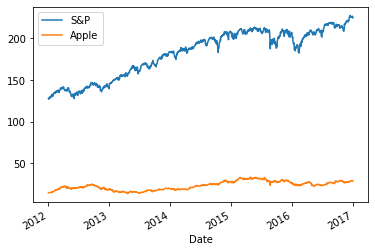

In [33]:
(spy['Open']).plot(label = 'S&P')
(apple['Open']).plot(label = 'Apple')
plt.legend()

In [34]:
spy['cum']= spy['Close']/spy['Close'][0]

In [35]:
apple['cum']= apple['Close']/apple['Close'][0]

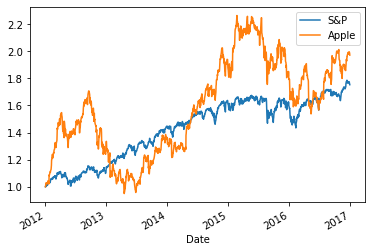

In [36]:
(spy['cum']).plot(label = 'S&P')
(apple['cum']).plot(label = 'Apple')
plt.legend()

In [37]:
spy['cum']

Date
2012-01-03    1.000000
2012-01-04    1.001569
2012-01-05    1.004235
2012-01-06    1.001647
2012-01-09    1.004078
                ...   
2016-12-23    1.770275
2016-12-27    1.774667
2016-12-28    1.760000
2016-12-29    1.759608
2016-12-30    1.753176
Name: cum, Length: 1258, dtype: float64

In [38]:
apple['cum']

Date
2012-01-03    1.000000
2012-01-04    1.005374
2012-01-05    1.016536
2012-01-06    1.027162
2012-01-09    1.025533
                ...   
2016-12-23    1.983416
2016-12-27    1.996012
2016-12-28    1.987501
2016-12-29    1.986990
2016-12-30    1.971500
Name: cum, Length: 1258, dtype: float64

In [45]:
import numpy as np
apple['Daily Return'] = 100*np.divide(apple['cum']-apple.shift(1)['cum'], apple.shift(1)['cum'])

In [46]:
import numpy as np
spy['Daily Return'] = 100*np.divide(spy['cum']-spy.shift(1)['cum'], spy.shift(1)['cum'])

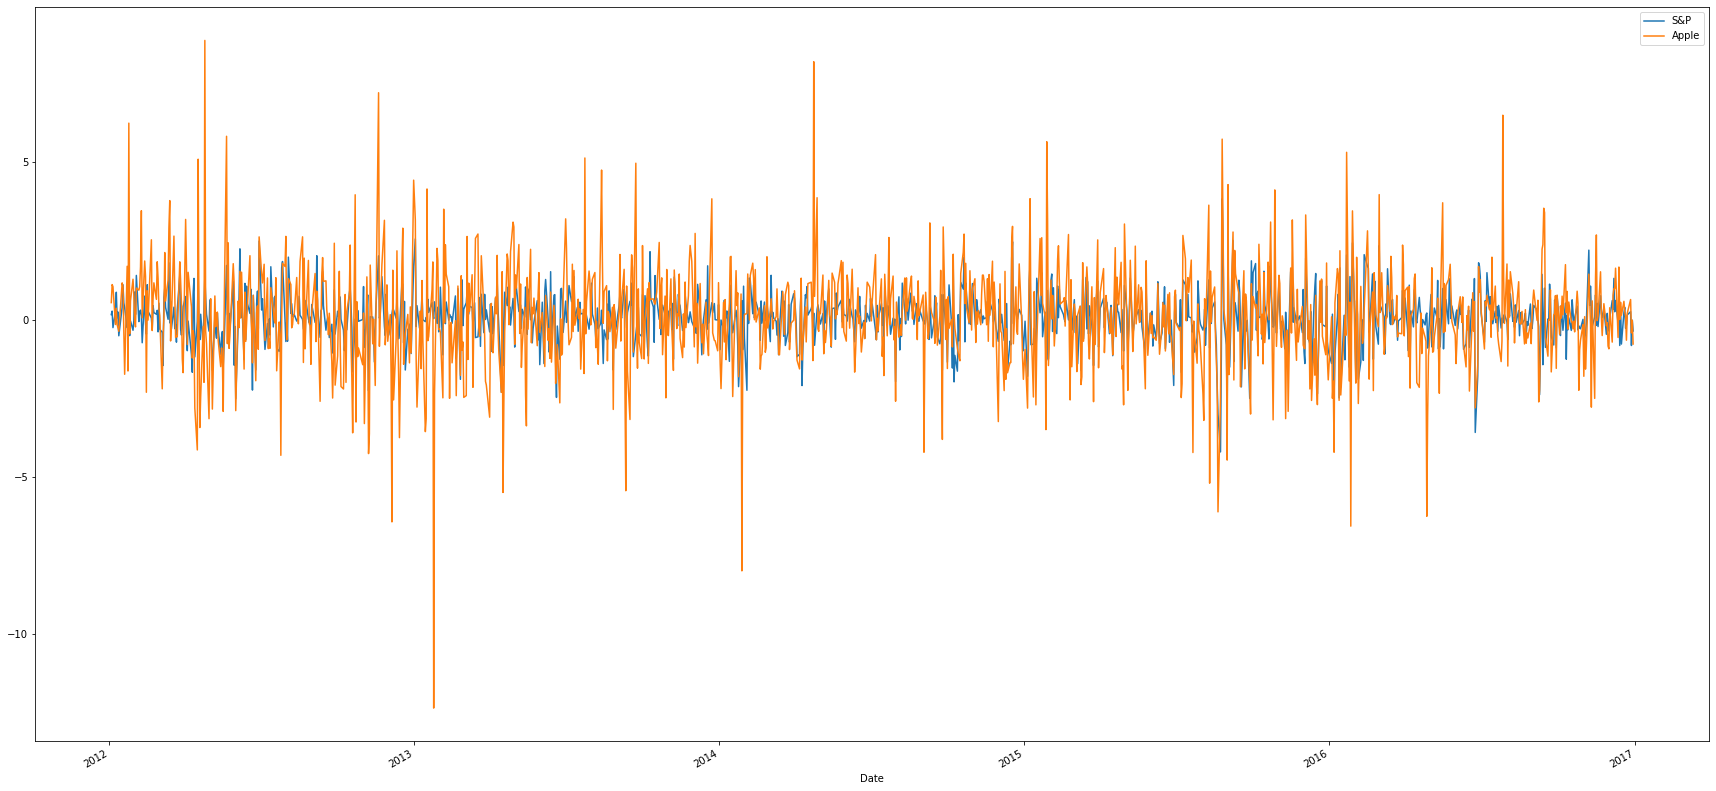

In [47]:
(spy['Daily Return']).plot(label = 'S&P', figsize = [30,15])
(apple['Daily Return']).plot(label = 'Apple')
plt.legend()

# Jai Shri Ram 
# Jai Bajarang Bali

In [48]:
from scipy.stats import linregress as lr

In [52]:
beta, alpha , corr, p_val, std_error = lr(spy['Daily Return'].iloc[1:],apple['Daily Return'].iloc[1:])

In [53]:
alpha

0.019193176939865803

In [54]:
p_val

2.4860147456448962e-79

#### Highly significant p val

In [55]:
spy['Daily Return'].head()

Date
2012-01-03         NaN
2012-01-04    0.156860
2012-01-05    0.266246
2012-01-06   -0.257727
2012-01-09    0.242742
Name: Daily Return, dtype: float64

In [56]:
spy['Daily Return'].std()

0.8102718954039898

In [57]:
fake_Stock = np.random.normal(0,0.5, size = spy.shape[0])

In [59]:
fake = fake_Stock+spy['Daily Return']

In [60]:
fake

Date
2012-01-03         NaN
2012-01-04    0.543874
2012-01-05    0.126851
2012-01-06    0.074348
2012-01-09    0.892782
                ...   
2016-12-23    0.153765
2016-12-27   -0.453406
2016-12-28   -0.616995
2016-12-29   -0.564407
2016-12-30   -0.747309
Name: Daily Return, Length: 1258, dtype: float64

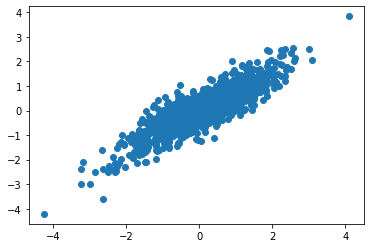

In [62]:
plt.scatter(fake,spy['Daily Return'])

In [61]:
beta, alpha , corr, p_val, std_error = lr(spy['Daily Return'].iloc[1:],fake.iloc[1:])

In [63]:
beta

1.0091091272112351

In [64]:
alpha

0.018421681569632718

In [67]:
p_val

0.0

In [68]:
std_error

0.01730439791219201